Setup for imports and input data from dataset.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

col = pd.read_excel('Sample - Superstore.xls', nrows=0).columns
df = pd.read_excel('Sample - Superstore.xls', names = col, index_col='Row ID')
df.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Feature Characteristics

In [38]:
# Finding feature characteristics

# for column in df.columns.values:
    # display(column, df[column].unique())

# Optionally one by one
df['Order ID'].unique()

array(['CA-2016-152156', 'CA-2016-138688', 'US-2015-108966', ...,
       'CA-2014-110422', 'CA-2017-121258', 'CA-2017-119914'], dtype=object)

In [39]:
# Loading the features into a dataframe
features_df = pd.read_csv('./features.csv', index_col ='col_name', encoding='unicode_escape')

features_df

,desc,data_type,"scale (N, O, I, R)",domain,missing_values
col_name,,,,,
Row ID,Row Number,Int,I,"[1, ..., 9994]",NaN
Order ID,Order Unique Identification Code,String,N,"['CA-2016-152156', 'CA-2016-138688', 'US-2015...",NaN
Order Date,Date of Order,Datetime,I,"[1/3/2014, ..., 12/30/2017]",NaN
Ship Date,Date of Order Shipment,Datetime,I,"[1/7/2014, ..., 1/05/2018",NaN
Ship Mode,Method of Shipment,String,N,"['Second Class', 'Standard Class', 'First Clas...",NaN
Customer ID,Customer Unique Identification Code,String,N,Any String,NaN
Customer Name,Customer Name,String,N,Any String,NaN
Segment,Customer's Market Segment,String,N,"['Consumer', 'Corporate', 'Home Office']",NaN
Country,Customer's Country,String,N,['United States'],NaN


Data Preprocessing.

In [40]:
# Code for Preprocessing.
# Dropping of the unnecessary features for our business problem
df = df.drop(columns=['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Country', 'Region'])
df

,Order ID,Customer ID,Segment,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,
1,CA-2016-152156,CG-12520,Consumer,Henderson,Kentucky,42420,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,CG-12520,Consumer,Henderson,Kentucky,42420,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,DV-13045,Corporate,Los Angeles,California,90036,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,SO-20335,Consumer,Fort Lauderdale,Florida,33311,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,SO-20335,Consumer,Fort Lauderdale,Florida,33311,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,CA-2014-110422,TB-21400,Consumer,Miami,Florida,33180,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9991,CA-2017-121258,DB-13060,Consumer,Costa Mesa,California,92627,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9992,CA-2017-121258,DB-13060,Consumer,Costa Mesa,California,92627,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


In [41]:
# Separating the features into cat and continuous dataframes
cont_df = df.drop(columns = ['Order ID', 'Customer ID', 'Segment', 'City', 'State', 'Postal Code', 'Product ID', 'Category', 'Sub-Category', 'Product Name'])
cat_df = df.drop(columns = ['Sales', 'Quantity', 'Discount', 'Profit'])
display(cont_df.head()) 
display(cat_df.head())

,Sales,Quantity,Discount,Profit
Row ID,,,,
1,261.9600,2,0.00,41.9136
2,731.9400,3,0.00,219.5820
3,14.6200,2,0.00,6.8714
4,957.5775,5,0.45,-383.0310
5,22.3680,2,0.20,2.5164


,Order ID,Customer ID,Segment,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name
Row ID,,,,,,,,,,
1,CA-2016-152156,CG-12520,Consumer,Henderson,Kentucky,42420,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
2,CA-2016-152156,CG-12520,Consumer,Henderson,Kentucky,42420,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
3,CA-2016-138688,DV-13045,Corporate,Los Angeles,California,90036,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
4,US-2015-108966,SO-20335,Consumer,Fort Lauderdale,Florida,33311,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
5,US-2015-108966,SO-20335,Consumer,Fort Lauderdale,Florida,33311,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


Outliers and Visualizations
2 Standard deviations away from the mean net generally less outliers (With acknowledging that Quantity has more outliers using this method, and Discount is the exact same amount in either method)

In [42]:
#Outlier detection Standard Deviation
def getMean(cont_df):
    return cont_df.mean()

def getSTD(cont_df):
    return cont_df.std()

def STD_upper(cont_df):
    return (getMean(cont_df) + (2 * getSTD(cont_df)))

def STD_lower(cont_df):
    return (getMean(cont_df) - (2 * getSTD(cont_df)))

def STD_outlier(cont_df):
    return cont_df[((cont_df < STD_lower(cont_df))) | (cont_df > STD_upper(cont_df))]
df_Sales = STD_outlier(cont_df['Sales'])
print("Outliers for Sales", 'Length:', len(df_Sales))
print("New boundries adjusted with IQR method: " , STD_lower(cont_df['Sales']), ',', STD_upper(cont_df['Sales'])) 
df_Quantity = STD_outlier(cont_df['Quantity'])
print("Outliers for Quantity", 'Length:', len(df_Quantity))
print("New boundries adjusted with IQR method: " , STD_lower(cont_df['Quantity']), ',', STD_upper(cont_df['Quantity'])) 
df_Discount = STD_outlier(cont_df['Discount'])
print("Outliers for Discount", 'Length:', len(df_Discount))
print("New boundries adjusted with IQR method: " , STD_lower(cont_df['Discount']), ',', STD_upper(cont_df['Discount'])) 
df_Profit = STD_outlier(cont_df['Profit'])
print("Outliers for Profit", 'Length:', len(df_Profit))
print("New boundries adjusted with IQR method: " , STD_lower(cont_df['Profit']), ',', STD_upper(cont_df['Profit'])) 

Outliers for Sales Length: 247
New boundries adjusted with IQR method:  -1016.6322001868633 , 1476.3482018478599
Outliers for Quantity Length: 428
New boundries adjusted with IQR method:  -0.660645638036252 , 8.239793126529348
Outliers for Discount Length: 856
New boundries adjusted with IQR method:  -0.25670121401845253 , 0.5691066572844121
Outliers for Profit Length: 179
New boundries adjusted with IQR method:  -439.86331907412995 , 497.1771116896993


In [43]:
#Outlier detections IQR
def Q1(cont_df):
    return cont_df.quantile(0.25)

def Q3(cont_df):
    return cont_df.quantile(0.75)

def IQR(cont_df):
    return Q3(cont_df) - Q1(cont_df)

def Lowerbound(cont_df):
    return (Q1(cont_df) - 1.5*(IQR(cont_df)))

def Upperbound(cont_df):
    return (Q3(cont_df) + 1.5*(IQR(cont_df)))
def IQR_outlier(cont_df):
    return cont_df[((cont_df < Lowerbound(cont_df)) | (cont_df > Upperbound(cont_df)))]
df_Sales = IQR_outlier(cont_df['Sales'])
print("Outliers for Sales", 'Length:', len(df_Sales))
print("New boundries adjusted with IQR method: " , Lowerbound(cont_df['Sales']), ',', Upperbound(cont_df['Sales'])) 
df_Quantity = IQR_outlier(cont_df['Quantity'])
print("Outliers for Quantity",  'Length:', len(df_Quantity))
print("New boundries adjusted with IQR method: " , Lowerbound(cont_df['Quantity']), ',', Upperbound(cont_df['Quantity'])) 
df_Discount = IQR_outlier(cont_df['Discount'])
print("Outliers for Discount",  'Length:', len(df_Discount))
print("New boundries adjusted with IQR method: " , Lowerbound(cont_df['Discount']), ',', Upperbound(cont_df['Discount'])) 
df_Profit = IQR_outlier(cont_df['Profit'])
print("Outliers for Profit",  'Length:', len(df_Profit))
print("New boundries adjusted with IQR method: " , Lowerbound(cont_df['Profit']), ',', Upperbound(cont_df['Profit'])) 

Outliers for Sales Length: 1167
New boundries adjusted with IQR method:  -271.71000000000004 , 498.93
Outliers for Quantity Length: 170
New boundries adjusted with IQR method:  -2.5 , 9.5
Outliers for Discount Length: 856
New boundries adjusted with IQR method:  -0.30000000000000004 , 0.5
Outliers for Profit Length: 1881
New boundries adjusted with IQR method:  -39.724124999999994 , 70.81687499999998


Data Quality Reports for Continuous Features.

In [44]:
#Code for continuous features.

dqr_cont = pd.DataFrame(columns=['Desc.', 'Count', '% of Missing', 'Card.', 'Min', 'Q1', 'Median', 'Q3', 'Max.', 'Mean', 'Std. Dev.', 'Notes'], index=list(cont_df.columns.values))
dqr_cont['Desc.'] = features_df['desc']
dqr_cont['Count'] = cont_df.count()
dqr_cont['% of Missing'] = (cont_df.isnull().sum().divide(cont_df.count())*100).round(2)
dqr_cont['Card.'] = cont_df.nunique()
dqr_cont['Min'] = cont_df.min()
dqr_cont['Q1'] = cont_df.quantile(0.25).round(2)
dqr_cont['Median'] = cont_df.median()
dqr_cont['Q3'] = cont_df.quantile(0.75).round(2)
dqr_cont['Max.'] = cont_df.max()
dqr_cont['Mean'] = cont_df.mean().round(2)
dqr_cont['Std. Dev.'] = cont_df.std().round(2)


dqr_cont

,Desc.,Count,% of Missing,Card.,Min,Q1,Median,Q3,Max.,Mean,Std. Dev.,Notes
Sales,Sale Amount per Product,9994,0.0,6144,0.444,17.28,54.4900,209.94,22638.480,229.86,623.25,NaN
Quantity,Quantity of Product Sold,9994,0.0,14,1.000,2.00,3.0000,5.00,14.000,3.79,2.23,NaN
Discount,Percent Discount per Product,9994,0.0,12,0.000,0.00,0.2000,0.20,0.800,0.16,0.21,NaN
Profit,Profit per Product,9994,0.0,7545,-6599.978,1.73,8.6665,29.36,8399.976,28.66,234.26,NaN


Data Quality Reports for Cat Features.

In [45]:
#Code for cat features.
cat_columns = list(cat_df.columns.values)
columns = pd.DataFrame(list(cont_df.columns.values))
mode = pd.DataFrame(columns = ['Mode'])
mode_freq = pd.DataFrame(columns = ['Mode Freq.'])
mode_per = pd.DataFrame(columns = ['Mode %'])
mode2 = pd.DataFrame(columns = ['2nd Mode'])
mode2_freq = pd.DataFrame(columns = ['2nd Mode Freq.'])
mode2_per = pd.DataFrame(columns = ['2nd Mode %'])
notes = pd.DataFrame(columns = ['Notes'])

dqr_cat = pd.DataFrame(columns=['Desc.', 'Count', '% of Missing', 'Card.'], index=cat_columns)
dqr_cat['Desc.'] = features_df['desc']
dqr_cat['Count'] = cat_df.count()
dqr_cat['% of Missing'] = (cat_df.isnull().sum().divide(cat_df.count())*100).round(2)
dqr_cat['Card.'] = cat_df.nunique()

for values in cat_columns: mode.loc[values] = cat_df[values].value_counts().index.tolist()[0]
dqr_cat['Mode'] = mode

for values in cat_columns: mode_freq.loc[values] = cat_df[values].value_counts().tolist()[0]
dqr_cat['Mode Freq.'] = mode_freq

for values in cat_columns: mode_per.loc[values] = ((cat_df[values].value_counts(normalize=True))*100).round(2).tolist()[0]
dqr_cat['Mode %'] = mode_per

for values in cat_columns: mode2.loc[values] = cat_df[values].value_counts().index.tolist()[1]
dqr_cat['2nd Mode'] = mode2

for values in cat_columns: mode2_freq.loc[values] = cat_df[values].value_counts().tolist()[1]
dqr_cat['2nd Mode Freq.'] = mode2_freq

for values in cat_columns: mode2_per.loc[values] = (((cat_df[values].value_counts(normalize=True))*100).round(2)).tolist()[1]
dqr_cat['2nd Mode %'] = mode2_per

dqr_cat['Notes'] = notes

dqr_cat

,Desc.,Count,% of Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %,Notes
Order ID,Order Unique Identification Code,9994,0.0,5009,CA-2017-100111,14,0.14,CA-2017-157987,12,0.12,NaN
Customer ID,Customer Unique Identification Code,9994,0.0,793,WB-21850,37,0.37,JL-15835,34,0.34,NaN
Segment,Customer's Market Segment,9994,0.0,3,Consumer,5191,51.94,Corporate,3020,30.22,NaN
City,Customer's City,9994,0.0,531,New York City,915,9.16,Los Angeles,747,7.47,NaN
State,Customer's State,9994,0.0,49,California,2001,20.02,New York,1128,11.29,NaN
Postal Code,Customer's Postal Code,9994,0.0,631,10035,263,2.63,10024,230,2.30,NaN
Product ID,Product Unique Identification Code,9994,0.0,1862,OFF-PA-10001970,19,0.19,TEC-AC-10003832,18,0.18,NaN
Category,Product Categroy,9994,0.0,3,Office Supplies,6026,60.30,Furniture,2121,21.22,NaN
Sub-Category,Product Sub-Category,9994,0.0,17,Binders,1523,15.24,Paper,1370,13.71,NaN
Product Name,Name of Product,9994,0.0,1850,Staple envelope,48,0.48,Staples,46,0.46,NaN


Data Visualization of Continuous Features.

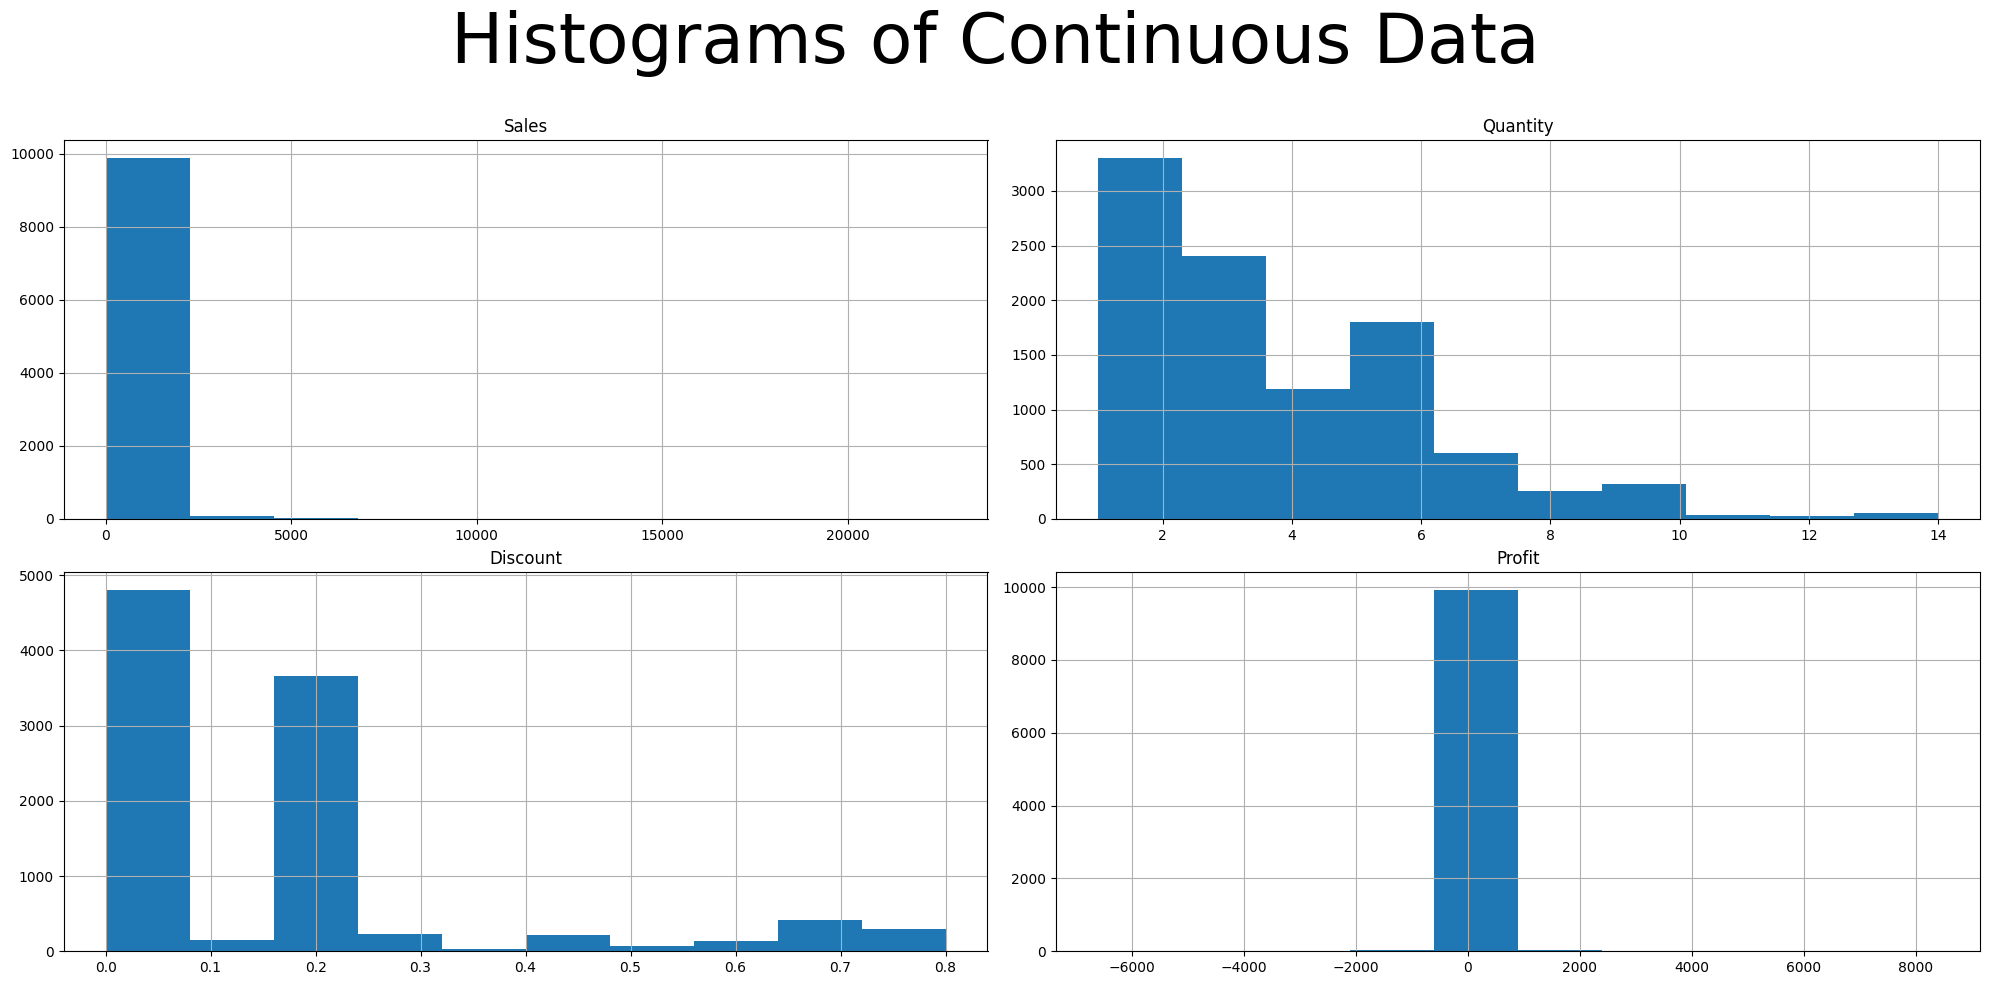

In [46]:
#Code for Continuous.
fig, axes = plt.subplots(2, 2, figsize=(20,10))
Sales = cont_df.Sales.hist(ax=axes[0,0]).set_title('Sales')
Quantity = cont_df.Quantity.hist(ax=axes[0,1]).set_title('Quantity')
Discount = cont_df.Discount.hist(ax=axes[1,0]).set_title('Discount')
Profit = cont_df.Profit.hist(ax=axes[1,1]).set_title('Profit')
fig.tight_layout()
fig.subplots_adjust(top=.85)
fig.suptitle("Histograms of Continuous Data", fontsize=50)
plt.show()

Data Visualization of Cat Features.
This is every single graph that is a cat feature, but the only ones that will need to be reported will be Segment, State, Category, and Sub-Category.

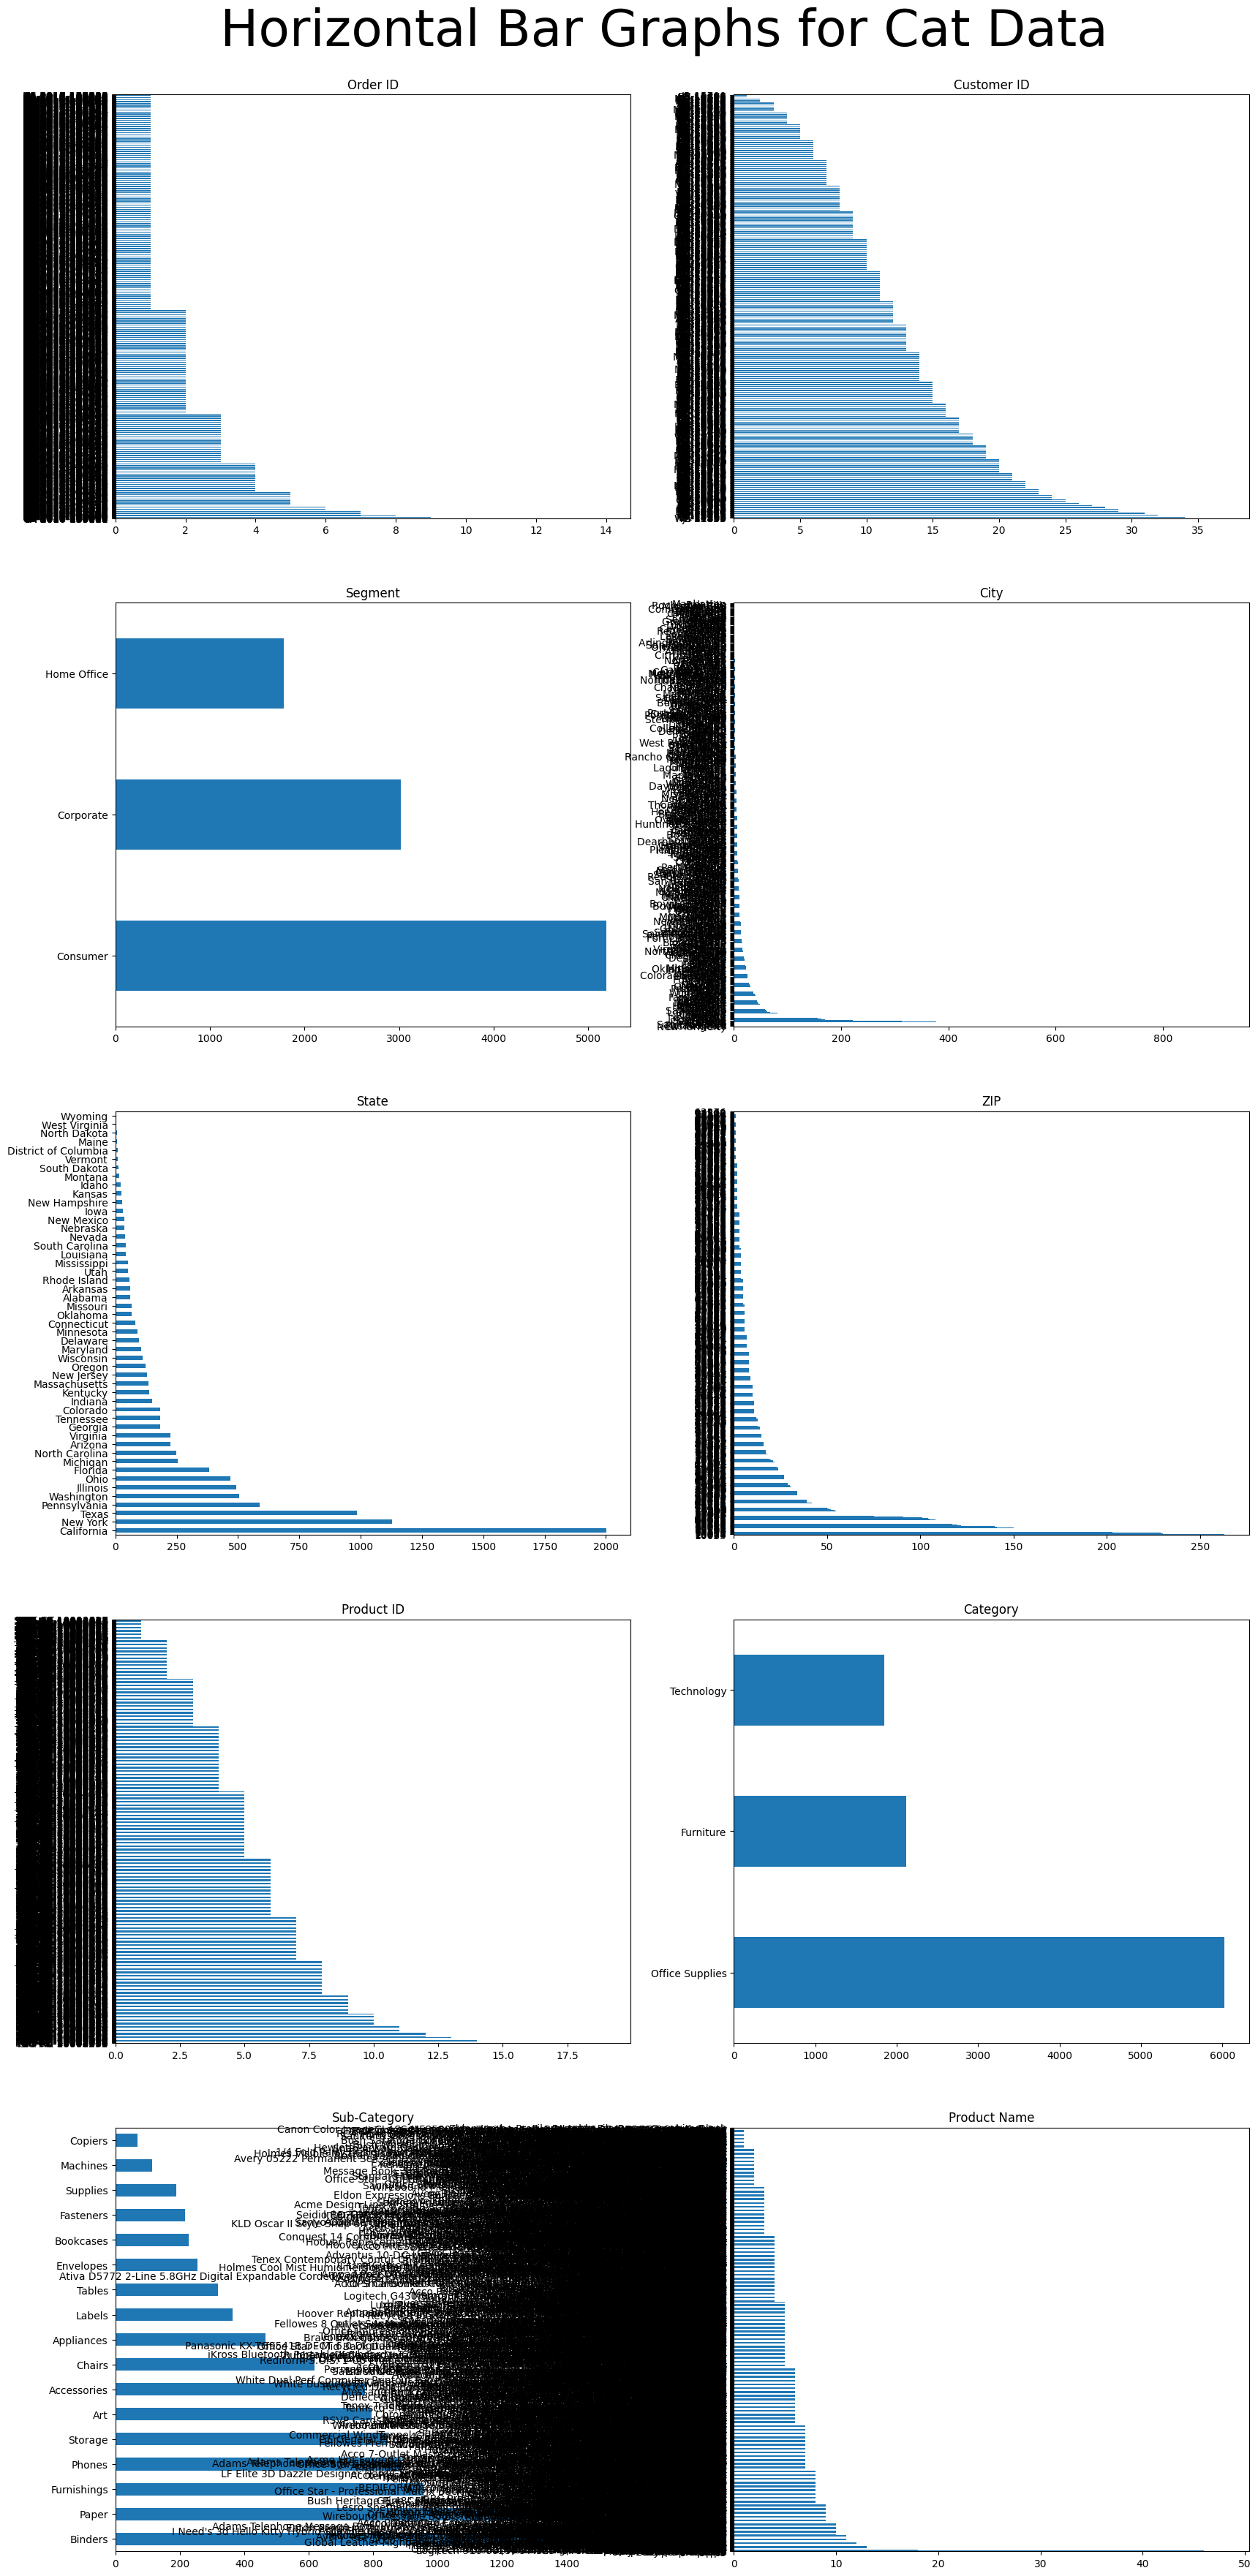

In [47]:
#Code for Cat.
fig, axes = plt.subplots(5, 2, figsize = (20,40))
Order = cat_df["Order ID"].value_counts().plot(ax=axes[0,0], kind='barh').set_title('Order ID')
Customer = cat_df['Customer ID'].value_counts().plot(ax=axes[0,1], kind='barh').set_title('Customer ID')
Segment = cat_df['Segment'].value_counts().plot(ax=axes[1,0], kind='barh').set_title('Segment')
City = cat_df['City'].value_counts().plot(ax=axes[1,1],kind='barh').set_title('City')
State = cat_df['State'].value_counts().plot(ax=axes[2,0], kind='barh').set_title('State')
ZIP	= cat_df['Postal Code'].value_counts().plot(ax=axes[2,1], kind='barh').set_title('ZIP')
Product	= cat_df['Product ID'].value_counts().plot(ax=axes[3,0], kind='barh').set_title('Product ID')
Cateogry = cat_df['Category'].value_counts().plot(ax=axes[3,1], kind='barh').set_title('Category')
Sub	= cat_df['Sub-Category'].value_counts().plot(ax=axes[4,0], kind='barh').set_title('Sub-Category')
Product = cat_df['Product Name'].value_counts().plot(ax=axes[4,1], kind='barh').set_title('Product Name')


fig.subplots_adjust(top=.95)
fig.suptitle("Horizontal Bar Graphs for Cat Data", fontsize=50)
plt.show()

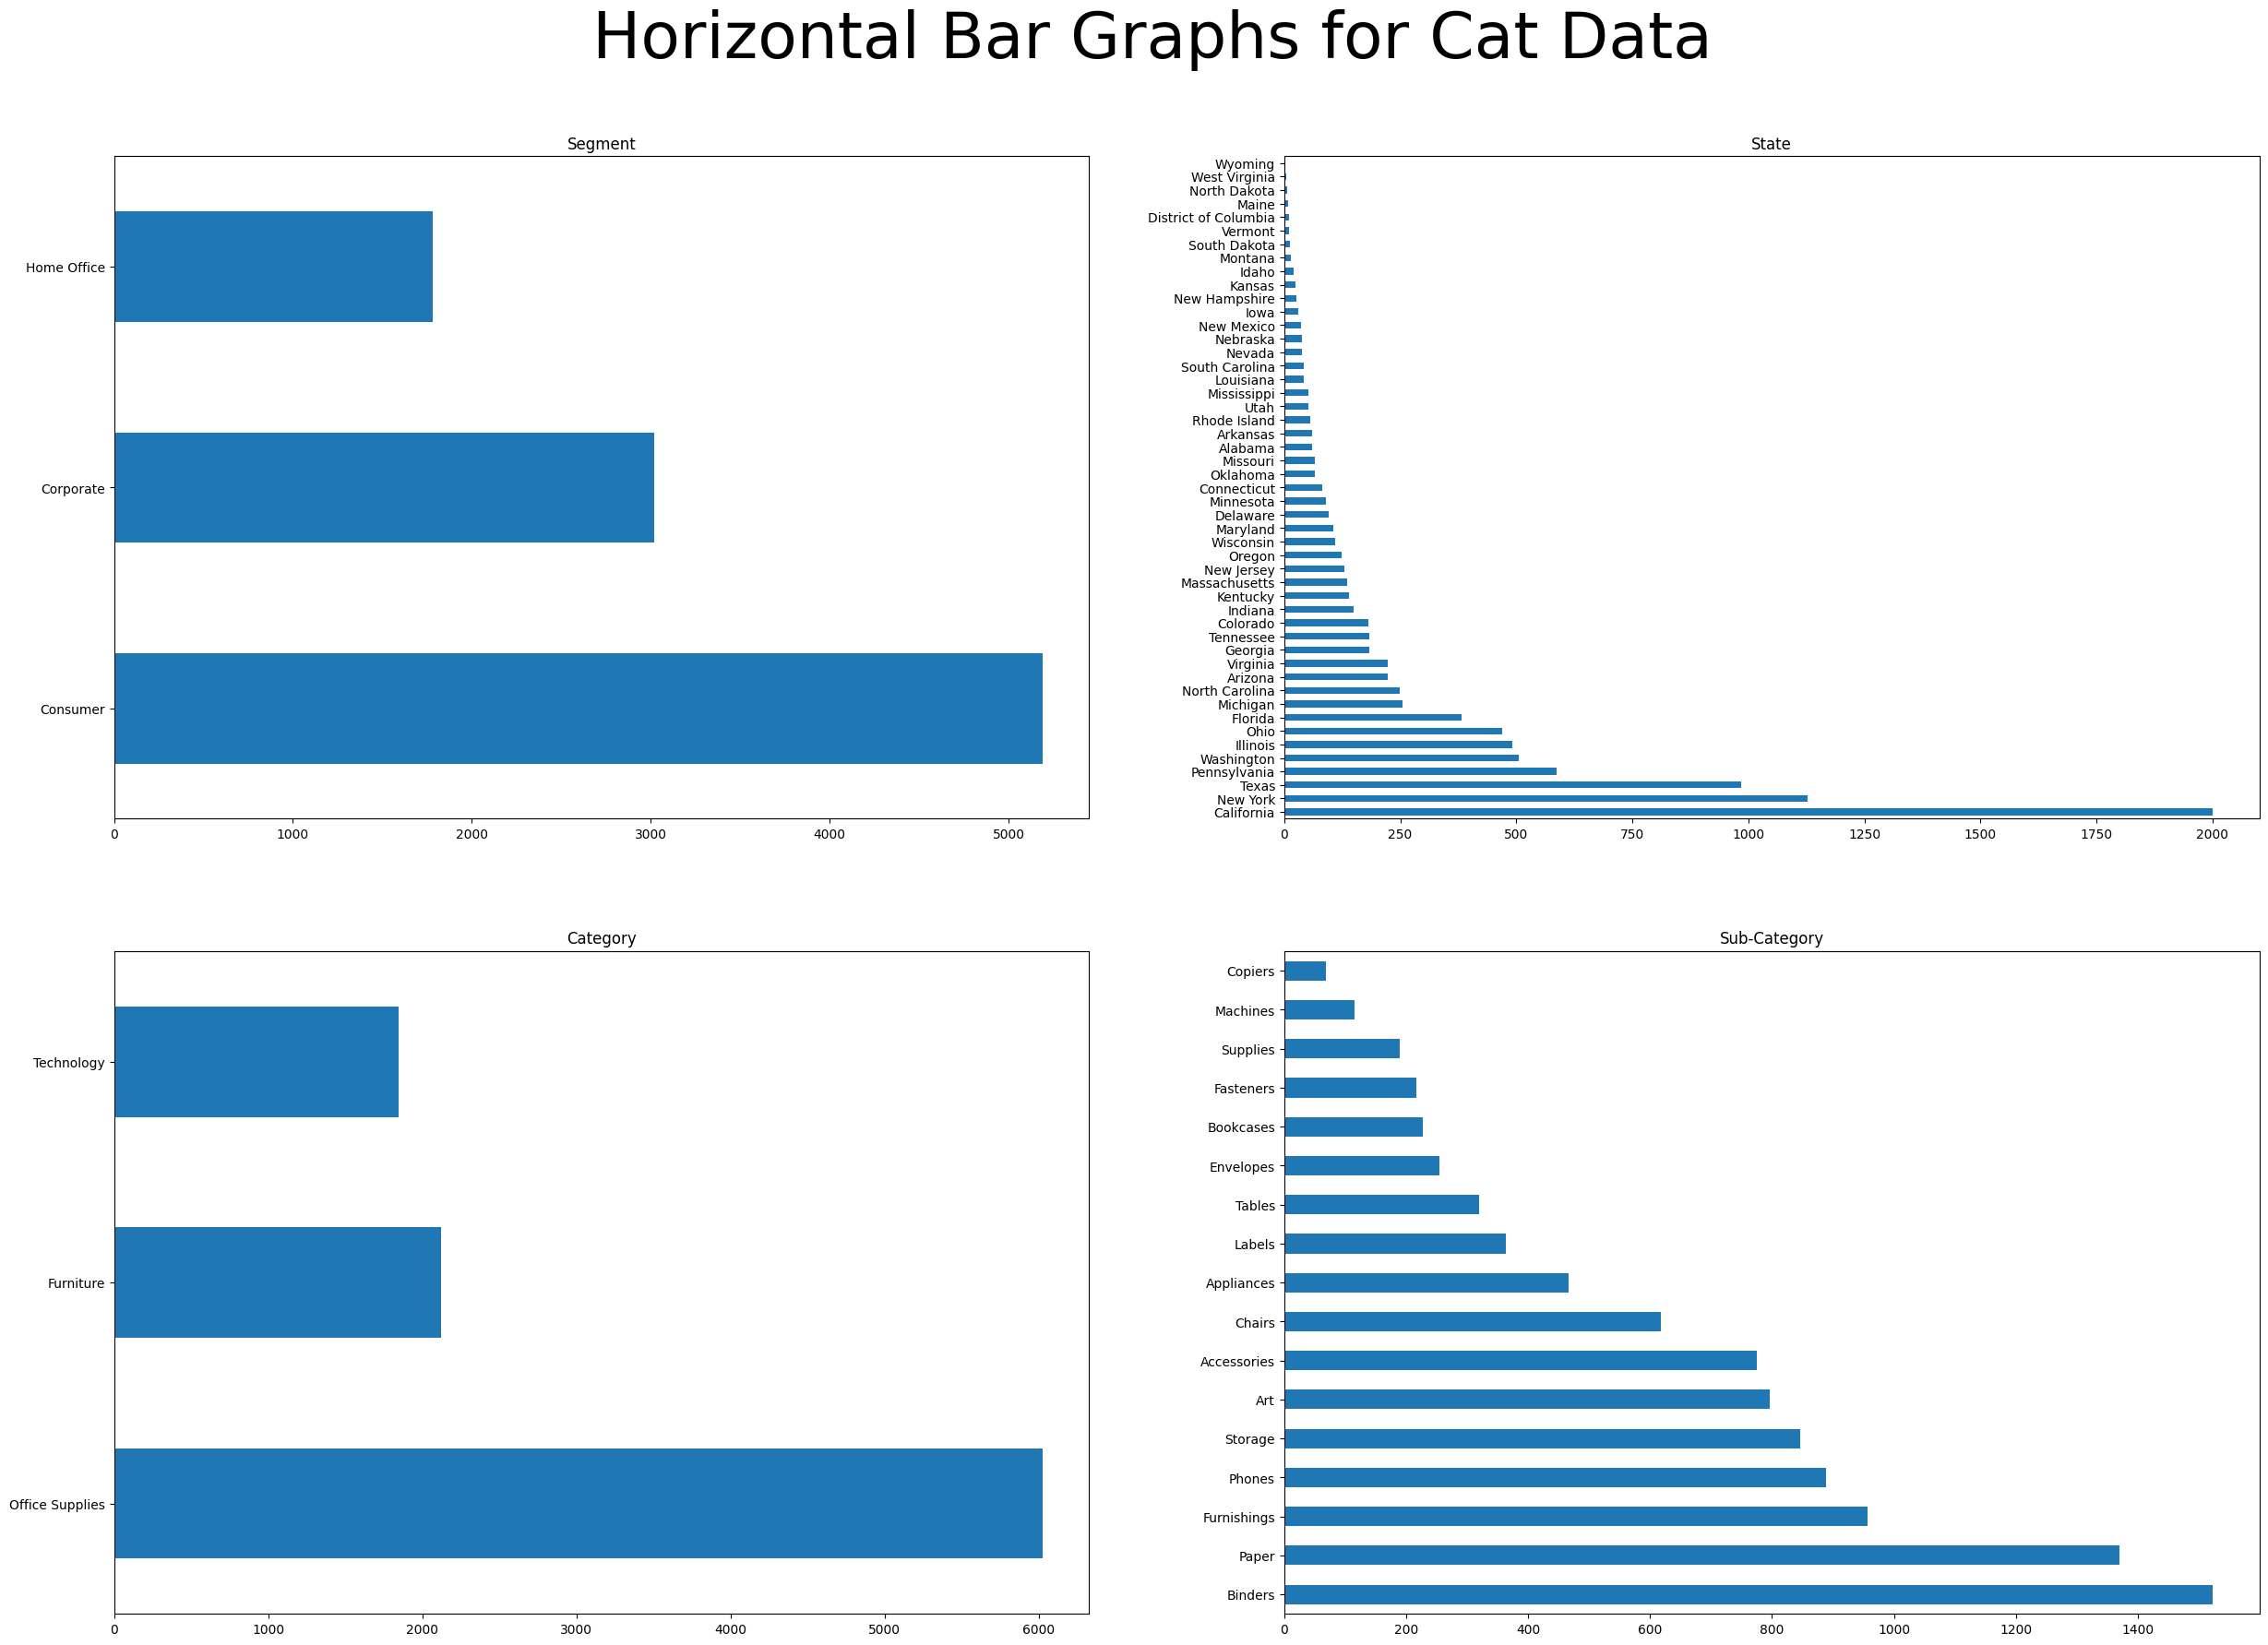

In [48]:
fig, axes = plt.subplots(2, 2, figsize = (30
                                          ,20))
Segment = cat_df['Segment'].value_counts().plot(ax=axes[0,0], kind='barh').set_title('Segment')
State = cat_df['State'].value_counts().plot(ax=axes[0,1], kind='barh').set_title('State')
Cateogry = cat_df['Category'].value_counts().plot(ax=axes[1,0], kind='barh').set_title('Category')
Sub	= cat_df['Sub-Category'].value_counts().plot(ax=axes[1,1], kind='barh').set_title('Sub-Category')


fig.subplots_adjust(top=.9)
fig.suptitle("Horizontal Bar Graphs for Cat Data", fontsize=50)
plt.show()

Normalization
- Normalizes the data to better show the spread of the data
- Used Z-score normalization because it handles outliers better than range normalization

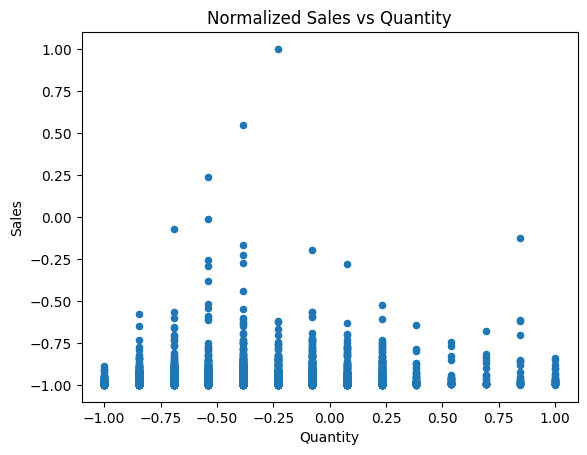

Correlation between sales and quantity: 0.2007947713738976


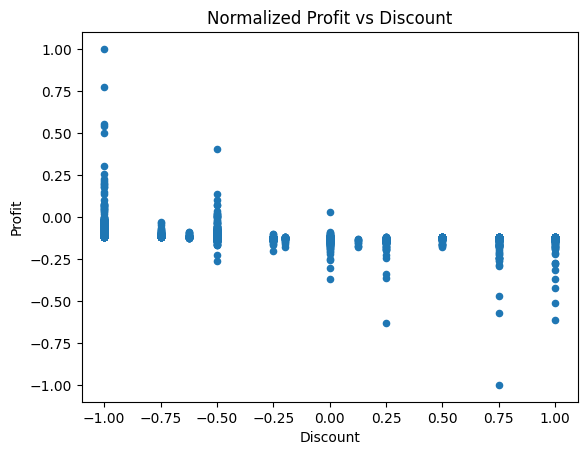

Correlation between profit and discount: -0.2194874563717686


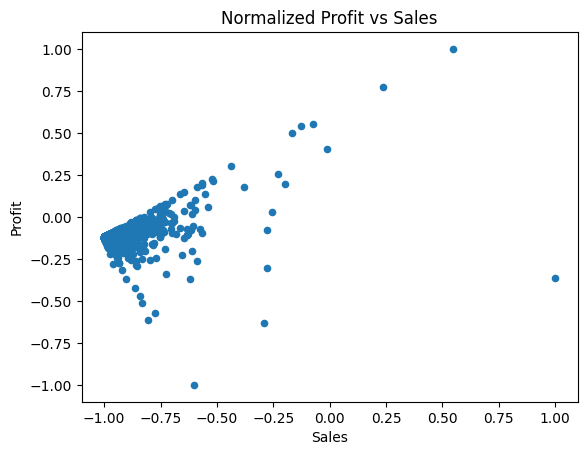

Correlation between profit and sales: 0.4790643497377062


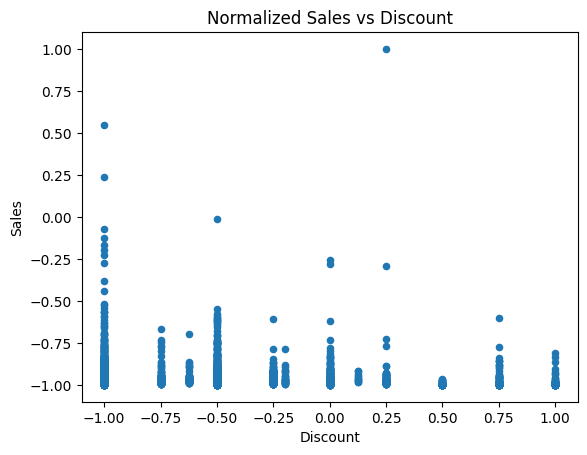

Correlation between sales and Discount: -0.02819012415753558


,Order ID,Customer ID,Segment,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,
1,CA-2016-152156,CG-12520,Consumer,Henderson,Kentucky,42420,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,-0.976896,-0.846154,-1.000,-0.114412
2,CA-2016-152156,CG-12520,Consumer,Henderson,Kentucky,42420,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",-0.935375,-0.692308,-1.000,-0.090723
3,CA-2016-138688,DV-13045,Corporate,Los Angeles,California,90036,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,-0.998748,-0.846154,-1.000,-0.119084
4,US-2015-108966,SO-20335,Consumer,Fort Lauderdale,Florida,33311,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,-0.915440,-0.384615,0.125,-0.171071
5,US-2015-108966,SO-20335,Consumer,Fort Lauderdale,Florida,33311,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,-0.998063,-0.846154,-0.500,-0.119665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,CA-2014-110422,TB-21400,Consumer,Miami,Florida,33180,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,-0.997809,-0.692308,-0.500,-0.119453
9991,CA-2017-121258,DB-13060,Consumer,Costa Mesa,California,92627,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,-0.991915,-0.846154,-1.000,-0.117916
9992,CA-2017-121258,DB-13060,Consumer,Costa Mesa,California,92627,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,-0.977195,-0.846154,-0.500,-0.117414


In [51]:
#range Normalization
def normal(x):
    min = x.min()
    max = x.max()
    x = x.map(lambda x : ((x-min)/(max-min))*(2)-1)
    return x
df['Quantity'] = normal(df['Quantity'])
df['Sales'] = normal(df['Sales'])
df['Discount'] = normal(df['Discount'])
df['Profit'] = normal(df['Profit'])
#displaying range normalized Continuous data.
#Sales vs Quantity
SQ = df.plot.scatter(x='Quantity',y='Sales').set_title('Normalized Sales vs Quantity')
plt.show()
print("Correlation between sales and quantity: "+str(df['Quantity'].corr(df['Sales'])))
#Profit vs Discount
PD = df.plot.scatter(x='Discount',y='Profit').set_title('Normalized Profit vs Discount')
plt.show()
print("Correlation between profit and discount: "+str(df['Discount'].corr(df['Profit'])))
#Profit vs Sales
PS = df.plot.scatter(x='Sales',y='Profit').set_title('Normalized Profit vs Sales')
plt.show()
print("Correlation between profit and sales: "+str(df['Sales'].corr(df['Profit'])))
#Sales vs Discount
SD = df.plot.scatter(x='Discount',y='Sales').set_title('Normalized Sales vs Discount')
plt.show()
print("Correlation between sales and Discount: "+str(df['Discount'].corr(df['Sales'])))
df
